In [31]:
from locallib import eyeutil
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


In [40]:
# Collect trigram frequencies within a sliding window
counters = []
window_size = 7
stride = 1
max_length = max([ len(msg) for msg in eyeutil.msgs_eye_tri ])

for i in range(0, max_length - window_size, stride):
    counter = Counter()
    for msg in eyeutil.msgs_eye_tri:
        if i > len(msg):
            continue
        end = min(i+window_size, len(msg))
        counter.update(msg[i:end])
    counters.append(counter)

trigram_freqs = []
for val in range(83):
    trigram_freqs.append([])
    for counter in counters:
        trigram_freqs[val].append(counter[val])


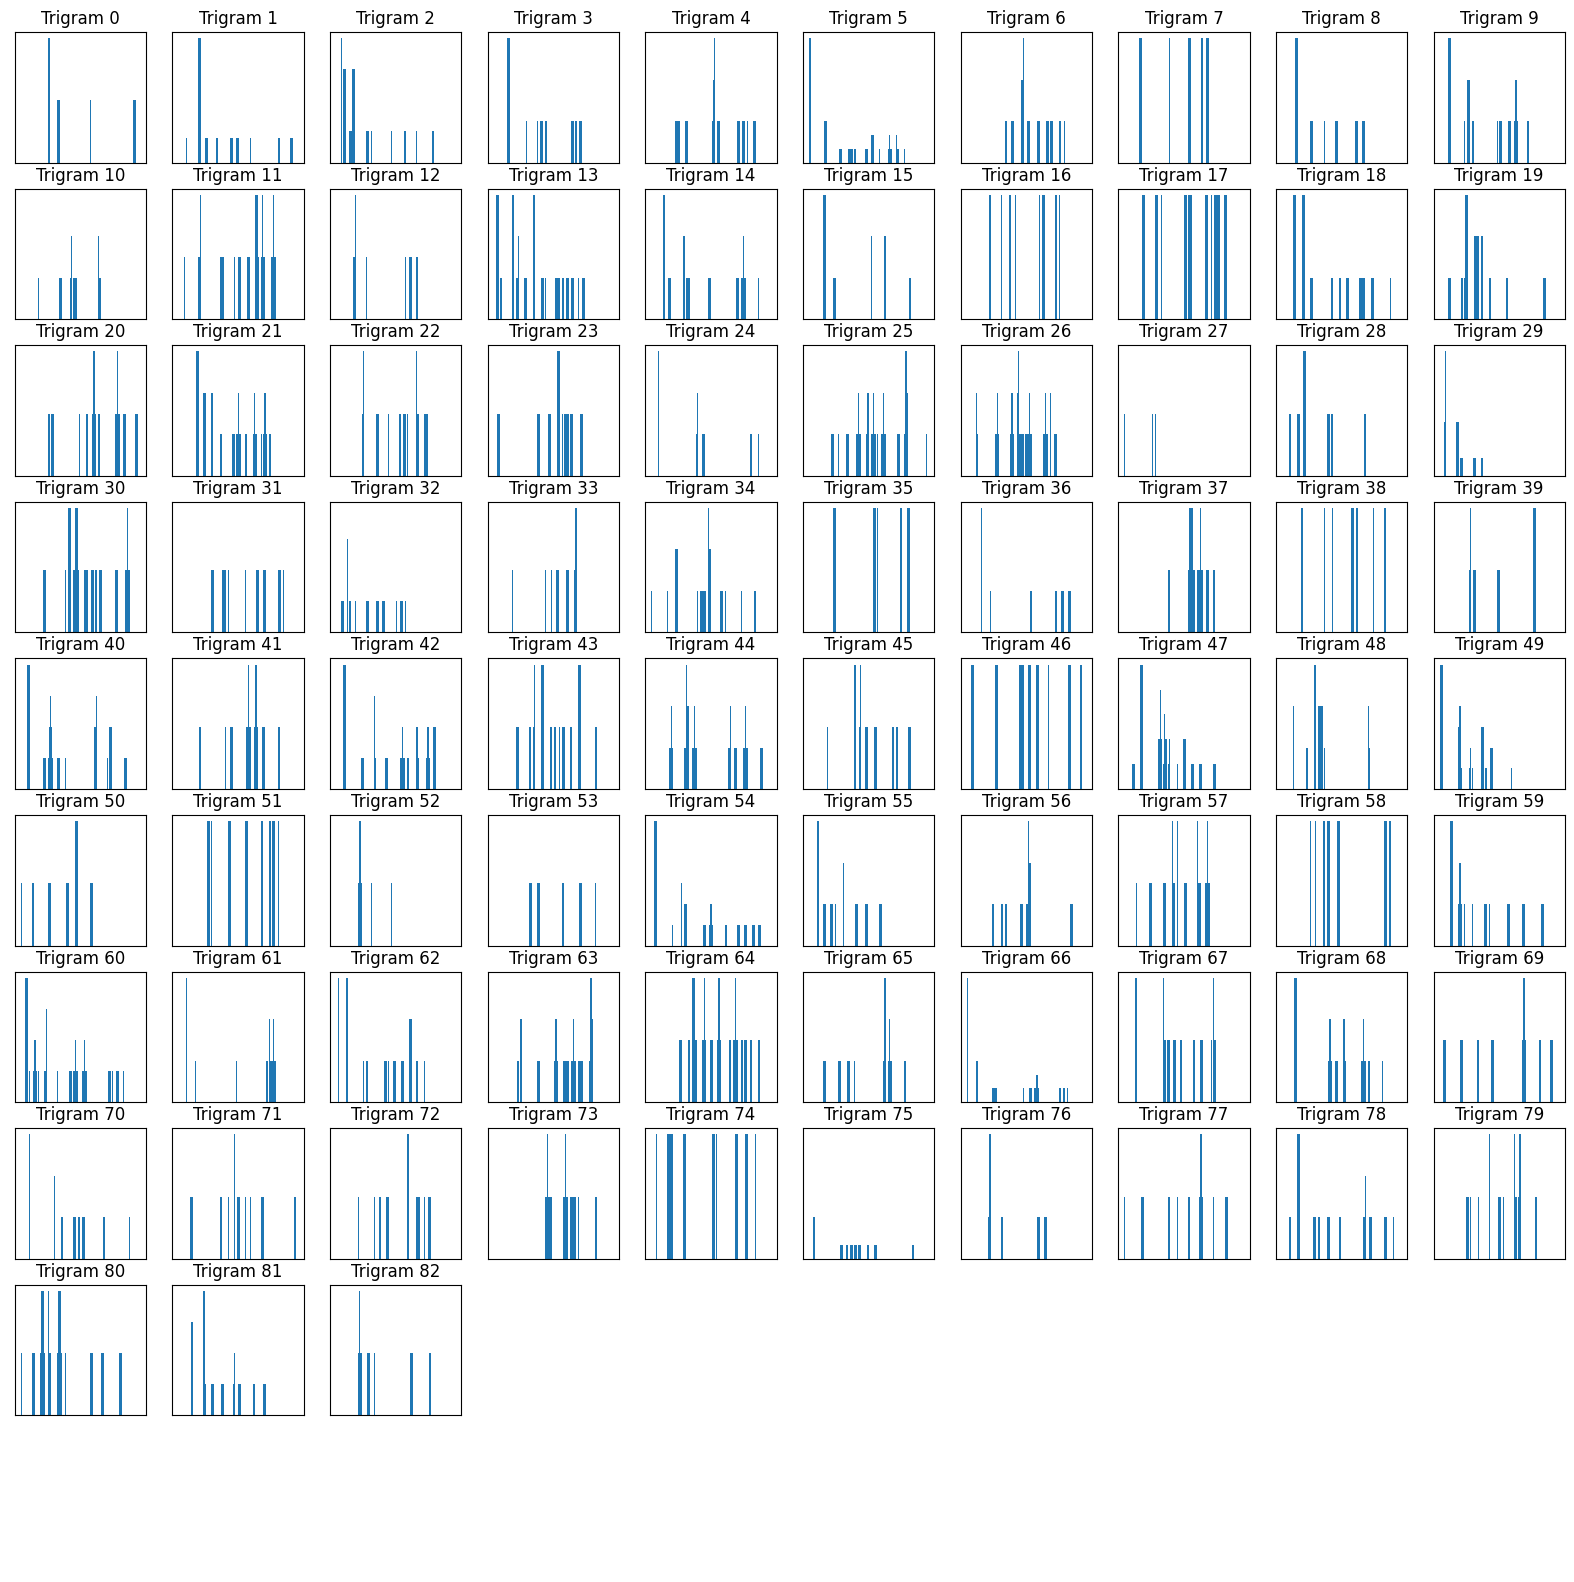

In [41]:
# Plot each trigram frequencies as seperate bar graphs
# Make each compact and small in a 10x10 grid
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
for i in range(83):
    ax = axs[i // 10, i % 10]
    ax.bar(range(len(trigram_freqs[i])), trigram_freqs[i])
    ax.set_title(f"Trigram {i}")
    ax.set_xticks([])
    ax.set_yticks([])

# Remove empty plots
for i in range(83, 100):
    axs[i // 10, i % 10].axis('off')


In [37]:
column_counts = [ [] for _ in range(83) ]
for msg in eyeutil.msgs_eye_tri:
    for i in range(len(msg)):
        column_counts[msg[i]].append(i)

print(sorted(column_counts[5]))
print(sorted(column_counts[27]))
print(sorted(column_counts[29]))


[2, 2, 2, 2, 2, 2, 2, 2, 2, 19, 19, 19, 36, 46, 49, 52, 65, 72, 72, 79, 90, 92, 97, 98, 100, 107]
[0, 33, 35]
[7, 7, 7, 8, 8, 8, 8, 21, 21, 21, 25, 40, 48, 102]
